In [1]:
import pandas as pd
import numpy as np

from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

In [2]:
df = pd.read_csv("yelp.csv")

In [3]:
df.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [4]:
df = df[["stars","text"]]

In [5]:
preprocessing = df["text"]

def firstFive(text):
    for i in range(5):
        print(preprocessing[i])
        print("------------------------")

In [6]:
#firstFive(preprocessing)

In [7]:
preprocessing = df["text"].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [8]:
preprocessing = preprocessing.str.replace("[^\w\s]"," ")

preprocessing

0       my wife took me here on my birthday for breakf...
1       i have no idea why some people give bad review...
2       love the gyro plate  rice is so good and i als...
3       rosie  dakota  and i love chaparral dog park  ...
4       general manager scott petello is a good egg   ...
                              ...                        
9995    first visit   had lunch here today   used my g...
9996    should be called house of deliciousness  i cou...
9997    i recently visited olive and ivy for business ...
9998    my nephew just moved to scottsdale recently so...
9999    4 5 locations   all 4 5 star average   i think...
Name: text, Length: 10000, dtype: object

In [9]:
preprocessing = preprocessing.str.replace("\d","")

preprocessing

0       my wife took me here on my birthday for breakf...
1       i have no idea why some people give bad review...
2       love the gyro plate  rice is so good and i als...
3       rosie  dakota  and i love chaparral dog park  ...
4       general manager scott petello is a good egg   ...
                              ...                        
9995    first visit   had lunch here today   used my g...
9996    should be called house of deliciousness  i cou...
9997    i recently visited olive and ivy for business ...
9998    my nephew just moved to scottsdale recently so...
9999      locations   all   star average   i think ari...
Name: text, Length: 10000, dtype: object

In [10]:
import nltk

#nltk.download("stopwords")

from nltk.corpus import stopwords

preprocessing = preprocessing.apply(lambda x: " ".join(x for x in x.split() if x not in stopwords.words("english")))

In [11]:
from nltk.stem.wordnet import WordNetLemmatizer

preprocessing = preprocessing.apply(lambda x: " ".join(WordNetLemmatizer().lemmatize(i,"v") 
                                                       for i in x.split()))

In [12]:
#preprocessing

In [13]:
df["text"] = preprocessing

In [14]:
dff = df.copy()

In [15]:
dff.head()

,stars,text
0,5,wife take birthday breakfast excellent weather...
1,5,idea people give bad review place go show plea...
2,4,love gyro plate rice good also dig candy selec...
3,5,rosie dakota love chaparral dog park convenien...
4,5,general manager scott petello good egg go deta...


In [16]:
dff.stars[dff.stars == 2] = 1 
dff.stars[dff.stars == 4] = 5

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [17]:
dff.head()

,stars,text
0,5,wife take birthday breakfast excellent weather...
1,5,idea people give bad review place go show plea...
2,5,love gyro plate rice good also dig candy selec...
3,5,rosie dakota love chaparral dog park convenien...
4,5,general manager scott petello good egg go deta...


In [18]:
dff.tail()

,stars,text
9995,3,first visit lunch today use groupon order brus...
9996,5,call house deliciousness could go item item bl...
9997,5,recently visit olive ivy business last week vi...
9998,1,nephew move scottsdale recently bunch friends ...
9999,5,locations star average think arizona really fa...


In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import mean_squared_error
from math import sqrt

tvec = TfidfVectorizer(stop_words=None, max_features=100000, ngram_range=(1, 3))
cv = CountVectorizer()
lr = LogisticRegression()
mb = MultinomialNB()
rfc = RandomForestClassifier(n_estimators=40)

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_score, recall_score, f1_score

def s_cv(splits, X, Y, pipeline, average_method):
    
    kfold = StratifiedKFold(n_splits=splits, shuffle=True, random_state=777)
    accuracy = []
    precision = []
    recall = []
    f1 = []
    for train, test in kfold.split(X, Y):
        s_fit = pipeline.fit(X[train], Y[train])
        prediction = s_fit.predict(X[test])
        scores = s_fit.score(X[test],Y[test])
        
        accuracy.append(scores * 100)
        precision.append(precision_score(Y[test], prediction, average=average_method)*100)
        print('              1          2          3')
        print('precision:',precision_score(Y[test], prediction, average=None))
        recall.append(recall_score(Y[test], prediction, average=average_method)*100)
        print('recall:   ',recall_score(Y[test], prediction, average=None))
        f1.append(f1_score(Y[test], prediction, average=average_method)*100)
        print('f1 score: ',f1_score(Y[test], prediction, average=None))
        
        rms = sqrt(mean_squared_error(Y[test], prediction))
        print(rms)
        
       
    print('-'*50)

    print("accuracy: %.2f%% (+/- %.2f%%)" % (np.mean(accuracy), np.std(accuracy)))
    print("precision: %.2f%% (+/- %.2f%%)" % (np.mean(precision), np.std(precision)))
    print("recall: %.2f%% (+/- %.2f%%)" % (np.mean(recall), np.std(recall)))
    print("f1 score: %.2f%% (+/- %.2f%%)" % (np.mean(f1), np.std(f1)))

In [34]:
from sklearn.pipeline import Pipeline
original_pipeline_LR = Pipeline([
    ('vectorizer', tvec),
    ('classifier', lr)
])

s_cv(5, dff.text, dff.stars, original_pipeline_LR, 'macro')

              1          2          3
precision: [0.82142857 0.70833333 0.75248619]
recall:    [0.41071429 0.05802048 0.99198835]
f1 score:  [0.54761905 0.10725552 0.85579642]
1.476421409970805
              1          2          3
precision: [0.82608696 0.61904762 0.74862486]
recall:    [0.39701493 0.04452055 0.99126001]
f1 score:  [0.53629032 0.08306709 0.85302413]
1.4906374475371267
              1          2          3
precision: [0.82716049 0.59259259 0.75317504]
recall:    [0.4        0.05479452 0.99344501]
f1 score:  [0.53923541 0.10031348 0.85678392]
1.4717336715588183
              1          2          3
precision: [0.82911392 0.59259259 0.75137817]
recall:    [0.39104478 0.05479452 0.99344023]
f1 score:  [0.53144016 0.10031348 0.85561833]
1.480234963704711
              1          2          3
precision: [0.86184211 0.59259259 0.7467033 ]
recall:    [0.39104478 0.05479452 0.99052478]
f1 score:  [0.53798768 0.10031348 0.85150376]
1.4910102467045252
---------------------------

In [21]:
from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import ADASYN, SMOTE, RandomOverSampler

ROS_pipeline_LR = make_pipeline(tvec, RandomOverSampler(random_state=777),lr)
SMOTE_pipeline_LR = make_pipeline(tvec, SMOTE(random_state=777),lr)

In [61]:
s_cv(5, dff.text, dff.stars, ROS_pipeline_LR, 'macro')

              1          2          3
precision: [0.66288952 0.4        0.86921965]
recall:    [0.69642857 0.36177474 0.87618354]
f1 score:  [0.67924528 0.37992832 0.8726877 ]
1.2626977446743122
              1          2          3
precision: [0.626703   0.42361111 0.88252788]
recall:    [0.68656716 0.41780822 0.86453023]
f1 score:  [0.65527066 0.42068966 0.87343635]
1.2930583900195691
              1          2          3
precision: [0.66137566 0.43494424 0.89209165]
recall:    [0.74626866 0.40068493 0.87909687]
f1 score:  [0.70126227 0.4171123  0.88554659]
1.202497401244593
              1          2          3
precision: [0.67052023 0.4760274  0.88831741]
recall:    [0.69253731 0.4760274  0.88119534]
f1 score:  [0.68135095 0.4760274  0.88474204]
1.2315674480878402
              1          2          3
precision: [0.68838527 0.41114983 0.87932303]
recall:    [0.72537313 0.40410959 0.87099125]
f1 score:  [0.70639535 0.40759931 0.87513731]
1.219320864943204
---------------------------

In [62]:
s_cv(5, dff.text, dff.stars, SMOTE_pipeline_LR, 'macro')

              1          2          3
precision: [0.63387978 0.41338583 0.87120116]
recall:    [0.69047619 0.35836177 0.87691187]
f1 score:  [0.66096866 0.38391225 0.87404719]
1.2900913395320752
              1          2          3
precision: [0.64402174 0.42857143 0.88387574]
recall:    [0.70746269 0.4109589  0.87035688]
f1 score:  [0.6742532  0.41958042 0.87706422]
1.2617448236470004
              1          2          3
precision: [0.66486486 0.42424242 0.88506589]
recall:    [0.73432836 0.38356164 0.88055353]
f1 score:  [0.69787234 0.4028777  0.88280394]
1.2132600710482482
              1          2          3
precision: [0.66855524 0.49253731 0.88171263]
recall:    [0.70447761 0.45205479 0.88556851]
f1 score:  [0.68604651 0.47142857 0.88363636]
1.2461044852636143
              1          2          3
precision: [0.68529412 0.4047619  0.87765568]
recall:    [0.69552239 0.40753425 0.87317784]
f1 score:  [0.69037037 0.40614334 0.87541103]
1.2266834865555556
-------------------------

In [63]:
from imblearn.under_sampling import NearMiss, RandomUnderSampler

RUS_pipeline_LR = make_pipeline(tvec, RandomUnderSampler(random_state=777),lr)

s_cv(5, dff.text, dff.stars, RUS_pipeline_LR, 'macro')

              1          2          3
precision: [0.54298643 0.33333333 0.90384615]
recall:    [0.71428571 0.53242321 0.7188638 ]
f1 score:  [0.61696658 0.40998686 0.80081136]
1.501913531380637
              1          2          3
precision: [0.54816514 0.30980392 0.92030361]
recall:    [0.71343284 0.54109589 0.70648216]
f1 score:  [0.61997406 0.39401496 0.79934075]
1.4656056768449008
              1          2          3
precision: [0.56043956 0.32751092 0.91628335]
recall:    [0.76119403 0.51369863 0.72541879]
f1 score:  [0.64556962 0.4        0.8097561 ]
1.4463747785411636
              1          2          3
precision: [0.57345972 0.35483871 0.92044403]
recall:    [0.72238806 0.60273973 0.72521866]
f1 score:  [0.63936592 0.44670051 0.81125153]
1.439804333324195
              1          2          3
precision: [0.58095238 0.32857143 0.90817264]
recall:    [0.72835821 0.55136986 0.72084548]
f1 score:  [0.64635762 0.41176471 0.80373832]
1.4425812005776764
---------------------------

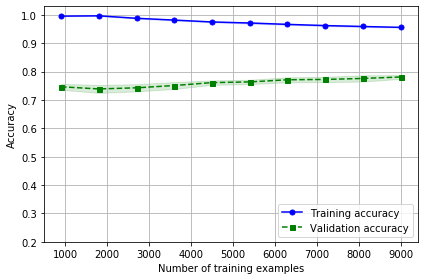

In [74]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.model_selection import train_test_split

train_sizes, train_scores, test_scores =\
                learning_curve(estimator=SMOTE_pipeline_LR,
                               X=dff.text,
                               y=dff.stars,
                               train_sizes=np.linspace(0.1, 1.0, 10),
                               cv=10,
                               n_jobs=1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='Training accuracy')

plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='Validation accuracy')

plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of training examples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.2, 1.03])
plt.tight_layout()
plt.show()

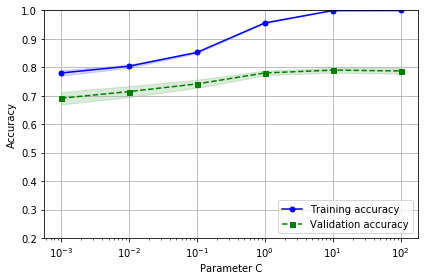

In [73]:
from sklearn.model_selection import validation_curve


param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
train_scores, test_scores = validation_curve(
                estimator=SMOTE_pipeline_LR, 
                X=dff.text, 
                y=dff.stars, 
                param_name='logisticregression__C', 
                param_range=param_range,
                cv=10)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(param_range, train_mean, 
         color='blue', marker='o', 
         markersize=5, label='Training accuracy')

plt.fill_between(param_range, train_mean + train_std,
                 train_mean - train_std, alpha=0.15,
                 color='blue')

plt.plot(param_range, test_mean, 
         color='green', linestyle='--', 
         marker='s', markersize=5, 
         label='Validation accuracy')

plt.fill_between(param_range, 
                 test_mean + test_std,
                 test_mean - test_std, 
                 alpha=0.15, color='green')

plt.grid()
plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('Parameter C')
plt.ylabel('Accuracy')
plt.ylim([0.2, 1.0])
plt.tight_layout()
plt.show()

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
     dff.text, dff.stars, test_size=0.25, random_state=42)

sum(y_train == 1), sum(y_train == 3), sum(y_train == 5)

(1274, 1087, 5139)

In [68]:
sum(y_test == 1), sum(y_test == 3), sum(y_test == 5)

(402, 374, 1724)

In [30]:
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from imblearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel

tfidf = TfidfVectorizer(strip_accents=None,
                        lowercase=False,
                        preprocessor=None)

model = Pipeline([
        ('vect', tfidf),
        ('sampling', SMOTE(random_state=42)),
        ('feature_selection', SelectFromModel(estimator=LogisticRegression(random_state=0, solver='liblinear'))),
        ('clf', LogisticRegression(random_state=0, solver='liblinear'))
    ])


param_grid = [{'vect__ngram_range': [(1, 3)],
               'clf__penalty': ['l1', 'l2'],
               'clf__C': [1.0, 10.0, 100.0]},
              {'vect__ngram_range': [(1, 3)],
               'vect__use_idf':[False],
               'vect__norm':[None],
               'clf__penalty': ['l1', 'l2'],
               'clf__C': [1.0, 10.0, 100.0]},
              ]

gs_lr_tfidf = GridSearchCV(model, param_grid,
                           scoring='accuracy',
                           cv=5,
                           verbose=2,
                           n_jobs=-1)               

In [31]:
gs_lr_tfidf.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed: 24.9min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed: 53.8min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('vect',
                                        TfidfVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.float64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=False,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                         

In [32]:
print('Best parameter set: %s ' % gs_lr_tfidf.best_params_)
print('CV Accuracy: %.3f' % gs_lr_tfidf.best_score_)

Best parameter set: {'clf__C': 10.0, 'clf__penalty': 'l2', 'vect__ngram_range': (1, 3)} 
CV Accuracy: 0.787


In [33]:
clf = gs_lr_tfidf.best_estimator_
print('Test Accuracy: %.3f' % clf.score(X_test, y_test))

Test Accuracy: 0.784


In [24]:
SMOTE_pipeline_MB = make_pipeline(cv, SMOTE(random_state=777),mb)

s_cv(5, dff.text, dff.stars, SMOTE_pipeline_MB, 'macro')

              1          2          3
precision: [0.65944272 0.33464567 0.83508772]
recall:    [0.63392857 0.29010239 0.86671522]
f1 score:  [0.64643399 0.31078611 0.85060758]
1.3594674869785772
              1          2          3
precision: [0.60660661 0.33596838 0.83380481]
recall:    [0.60298507 0.29109589 0.85870357]
f1 score:  [0.60479042 0.31192661 0.84607104]
1.421970463828275
              1          2          3
precision: [0.65443425 0.31854839 0.83719298]
recall:    [0.63880597 0.27054795 0.86890022]
f1 score:  [0.64652568 0.29259259 0.85275197]
1.3490737563232043
              1          2          3
precision: [0.63987138 0.34572491 0.82804792]
recall:    [0.59402985 0.31849315 0.85641399]
f1 score:  [0.61609907 0.3315508  0.84199212]
1.4166875102685403
              1          2          3
precision: [0.6572327  0.32098765 0.82892907]
recall:    [0.6238806  0.26712329 0.86880466]
f1 score:  [0.64012251 0.29158879 0.84839858]
1.3736606100983852
--------------------------

In [25]:
SMOTE_pipeline_RFC = make_pipeline(tvec, SMOTE(random_state=777),rfc)

s_cv(5, dff.text, dff.stars, SMOTE_pipeline_RFC, 'macro')

              1          2          3
precision: [0.67295597 0.23076923 0.73340832]
recall:    [0.31845238 0.05119454 0.94974508]
f1 score:  [0.43232323 0.08379888 0.82767375]
1.6239958858823003
              1          2          3
precision: [0.63276836 0.33333333 0.73734533]
recall:    [0.33432836 0.05136986 0.95484341]
f1 score:  [0.4375     0.08902077 0.83211679]
1.6291101865742537
              1          2          3
precision: [0.65269461 0.31884058 0.74433107]
recall:    [0.32537313 0.07534247 0.95630007]
f1 score:  [0.43426295 0.12188366 0.83710551]
1.5956190021430554
              1          2          3
precision: [0.67901235 0.45652174 0.73925181]
recall:    [0.32835821 0.07191781 0.96501458]
f1 score:  [0.44265594 0.12426036 0.83717989]
1.6053936104028075
              1          2          3
precision: [0.61413043 0.33846154 0.744     ]
recall:    [0.33731343 0.07534247 0.94897959]
f1 score:  [0.43545279 0.1232493  0.83408072]
1.6184281432388072
-------------------------